In [1]:
!pip install openpyxl

In [2]:
#라이브러리 임포트
import pandas as pd

df = pd.read_excel("C:/Users/152/Downloads/실습데이터_머니케어.xlsx")
df.head(100)


,time,review
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...
...,...,...
95,2022. 8. 6. 8:06,월의 마음 돈을 모아볼까 일주일 정말 후딱 가네지금 주째 씩 쉬고있다 아주피곤...
96,2022. 6. 14. 23:02,또 그냥 저냥 이런저런 나무의 드디어 냉장고가 들어왔다와우 그동안 냉장고 ...
97,2022. 12. 22. 12:58,주절주절 자궁내막암 병에 대한 고찰 정신이 육체를 지배한다 아침으로 먹은것잘 하고...
98,2023. 1. 10. 8:24,매일 가계부 년 월의 화요일 직장인 지출 유달리 부자 달리입니다아놔 스트레스 팍...


In [3]:
#형태소 분리 (불용어)
from konlpy.tag import Okt
okt=Okt()

In [4]:
#불용어
stopwords_df =pd.read_csv(r"C:\Users\152\Downloads\ko-stopwords (1).csv")
stopwords_df

,stopwords
0,가
1,가까스로
2,가령
3,각
4,각각
...,...
600,진짜
601,두
602,게
603,요


In [62]:
stopwords = set(stopwords_df['stopwords']) #집합 변경
custom_stopwords = {'하다', '싶다', '없다', '보다', '들다'}

In [63]:
'Noun', 'Adjective', 'Verb'

('Noun', 'Adjective', 'Verb')

In [64]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)
    result = [word for word, tag in pos_words if word not in stopwords if tag in {'Noun', 'Adjective', 'Verb'}]
    return result

In [65]:
okt_pos_tagging(df['review'][0])

['가계부',
 '지출',
 '생활비',
 '정산',
 '만',
 '원',
 '가계부',
 '인',
 '가구',
 '자취',
 '생활비',
 '식비',
 '아끼다',
 '고정',
 '지출',
 '생활비',
 '아끼다',
 '무',
 '지출',
 '직장인',
 '짜다',
 '테크',
 '벌써',
 '가계부',
 '작성',
 '한지',
 '개월',
 '되어다',
 '생활비',
 '원',
 '생활비',
 '원',
 '생활비',
 '지난달',
 '대비',
 '원',
 '바',
 '가계부',
 '쓰다',
 '의미',
 '없다',
 '정도',
 '로비',
 '슷',
 '개월',
 '사실',
 '달',
 '초',
 '저녁',
 '약속',
 '시험',
 '원서',
 '접수',
 '비',
 '고양이',
 '용품',
 '화끈하다',
 '돈',
 '써다',
 '버리다',
 '때문',
 '남다',
 '달',
 '쪼들리다',
 '사람',
 '이츠미',
 '달',
 '당근',
 '거래',
 '무려',
 '원',
 '벌다',
 '당근',
 '거래',
 '처음',
 '해보다',
 '떨리다',
 '애송이',
 '중고',
 '거래',
 '만렙',
 '되어다',
 '달',
 '갑작스럽다',
 '생기다',
 '약속',
 '서예',
 '비용',
 '벗어나다',
 '힐링',
 '수',
 '좋다',
 '지출',
 '보다',
 '고양이',
 '모래',
 '달',
 '만',
 '원',
 '들다',
 '줄',
 '모르다',
 '고양이',
 '간식',
 '밥',
 '장난감',
 '아니다',
 '모래',
 '제일',
 '비싸다',
 '달',
 '타투',
 '안',
 '전월',
 '덜',
 '써다',
 '거',
 '말',
 '후회',
 '전혀',
 '없다',
 '이제',
 '가계부',
 '작성',
 '아니다',
 '분석',
 '외식',
 '식비',
 '공부',
 '고양이',
 '약',
 '약속',
 '줄이다',
 '답',
 '없다',
 '물가',
 '후',
 '덜덜',
 '여름',
 '휴가',
 '제외',
 '

In [66]:
#데이터 프레임 추가 
df.head()

,time,review,tagged_review,vector,cluster
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[가계부, 지출, 생활비, 정산, 만, 원, 가계부, 인, 가구, 자취, 생활비, ...","[-0.27460337, -0.83280045, -1.417218, -0.01042...",11
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ...","[-0.84969825, -1.0601798, 0.4562442, 1.6346226...",5
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,"[예금, 진실, 문득, 투자, 경제, 흐름, 알다, 예금, 안정, 이자, 바라보다,...","[0.081767336, -0.9218832, -0.07563395, -0.4146...",5
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...,"[카카오, 뱅크, 청년, 전세, 자금, 대출, 연장, 금리, 변동, 카카오, 뱅크,...","[1.9424058, -2.0441067, -1.7724955, -0.5595085...",9
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...,"[탕, 다시다, 가다, 삼성, 병원, 가지, 베이컨, 그라탕, 해, 먹기, 미치다,...","[-2.0644355, -1.5463994, -1.951052, -0.8483214...",2


In [67]:
import re
from tqdm import tqdm

tqdm.pandas()

In [68]:
df['tagged_review'] = df['review'].progress_apply(lambda x: okt_pos_tagging(x))

100%|██████████████████████████████████████████████████████████████████████████████| 1019/1019 [03:25<00:00,  4.96it/s]


In [69]:
#백터화 
import gensim 
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec

In [70]:
print(df.columns.tolist())

['time', 'review', 'tagged_review', 'vector', 'cluster']


In [71]:
tagged_corpus_list = []
for n, i in enumerate(df['tagged_review']):
    tag = "document{}".format(n)
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words = i))

In [72]:
tagged_corpus_list[0]


TaggedDocument(words=['가계부', '지출', '생활비', '정산', '만', '원', '가계부', '인', '가구', '자취', '생활비', '식비', '아끼다', '고정', '지출', '생활비', '아끼다', '무', '지출', '직장인', '짜다', '테크', '벌써', '가계부', '작성', '한지', '개월', '되어다', '생활비', '원', '생활비', '원', '생활비', '지난달', '대비', '원', '바', '가계부', '쓰다', '의미', '없다', '정도', '로비', '슷', '개월', '사실', '달', '초', '저녁', '약속', '시험', '원서', '접수', '비', '고양이', '용품', '화끈하다', '돈', '써다', '버리다', '때문', '남다', '달', '쪼들리다', '사람', '이츠미', '달', '당근', '거래', '무려', '원', '벌다', '당근', '거래', '처음', '해보다', '떨리다', '애송이', '중고', '거래', '만렙', '되어다', '달', '갑작스럽다', '생기다', '약속', '서예', '비용', '벗어나다', '힐링', '수', '좋다', '지출', '보다', '고양이', '모래', '달', '만', '원', '들다', '줄', '모르다', '고양이', '간식', '밥', '장난감', '아니다', '모래', '제일', '비싸다', '달', '타투', '안', '전월', '덜', '써다', '거', '말', '후회', '전혀', '없다', '이제', '가계부', '작성', '아니다', '분석', '외식', '식비', '공부', '고양이', '약', '약속', '줄이다', '답', '없다', '물가', '후', '덜덜', '여름', '휴가', '제외', '공부', '열중', '터', '생활비', '만', '원', '목표', '보다', '파이팅'], tags=['document0'])

In [73]:
model_doc2vec = Doc2Vec(vector_size = 200,
                       alpha = 0.025,
                       min_alpha = 0.01,
                       window = 3,
                       min_count = 1, #최소n번 이상 등장한 단어만 학습에 사용하겠다
                        dm = 1
                       )

In [74]:
#단어사전 장착
model_doc2vec.build_vocab(tagged_corpus_list)

In [75]:
#학습
model_doc2vec.train(tagged_corpus_list, total_examples=model_doc2vec.corpus_count, epochs=100)

In [76]:
model_doc2vec.dv["document0"]

array([-0.7512716 , -0.36401916, -0.42330363, -0.5424419 ,  1.8639662 ,
       -1.540574  , -2.4884229 ,  0.87113446,  1.8056817 ,  1.6281891 ,
       -0.87447464,  1.2645718 , -2.1953785 , -1.5694033 ,  0.276472  ,
       -2.9605036 , -0.4554788 ,  0.43840948, -1.725138  ,  1.1759611 ,
       -0.5964771 , -2.3980079 , -0.89764607,  0.7242946 ,  1.792224  ,
        0.3014631 ,  0.5967047 , -1.5245644 , -1.8890642 ,  0.8712011 ,
       -0.29914975,  0.74803704, -1.5030639 , -0.665796  , -1.4947116 ,
       -0.21860333,  1.339458  , -0.74341875, -0.66849464,  0.5881048 ,
        0.01097628,  0.70263535,  0.90006554,  0.29306334,  0.01460654,
        1.1349523 , -1.3745878 , -1.8727288 , -0.20665681, -1.0159904 ,
        0.8243931 ,  0.82962924, -0.5960719 , -0.5634147 ,  1.0432448 ,
        0.18106847,  0.05831339,  0.54177064,  1.3792567 , -0.84110004,
       -0.7792754 ,  4.2851686 ,  0.65171736, -0.07009636, -1.4745616 ,
        1.6222101 , -0.11874461,  0.40478617, -0.693777  ,  1.67

In [77]:
#벡터 값 데이터 프레임 추가 
vector_list = []
for i in range(len(df)):
    doc2vec = model_doc2vec.dv['document{}'.format(i)]
    vector_list.append(doc2vec)

In [78]:
df['vector'] = vector_list #
df

,time,review,tagged_review,vector,cluster
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[가계부, 지출, 생활비, 정산, 만, 원, 가계부, 인, 가구, 자취, 생활비, ...","[-0.7512716, -0.36401916, -0.42330363, -0.5424...",11
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ...","[-0.21806592, -1.5534393, 0.97670776, 1.126477...",5
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,"[예금, 진실, 문득, 투자, 경제, 흐름, 알다, 예금, 안정, 이자, 바라보다,...","[0.2516184, -0.7921067, -0.2066104, -0.7261357...",5
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...,"[카카오, 뱅크, 청년, 전세, 자금, 대출, 연장, 금리, 변동, 카카오, 뱅크,...","[2.1138735, -2.89797, -1.661346, -0.20995872, ...",9
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...,"[탕, 다시다, 가다, 삼성, 병원, 가지, 베이컨, 그라탕, 해, 먹기, 미치다,...","[-1.3631692, 0.7304663, -1.853264, -1.9755169,...",2
...,...,...,...,...,...
1014,2022. 10. 11. 11:05,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...,"[스물, 보다, 주, 밸런스, 프렌즈, 토글, 리더, 스, 많다, 영감, 주다, 쯔...","[0.25923884, -1.6138186, 1.3513083, 1.2313381,...",0
1015,2023. 2. 5. 22:20,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모...,"[직장인, 생, 탤이, 생, 겨울방학, 끝, 동분서주, 바쁘다, 탤, 공주, 넘다,...","[-0.033567406, -0.49636593, 0.22517155, -4.549...",4
1016,2023. 4. 3. 14:11,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...,"[청년, 전세, 임대주택, 청약, 일정, 신청, 서울특별시, 순위, 청약, 신청, ...","[-1.1326004, -0.85432464, 0.35640538, -2.90792...",5
1017,2022. 9. 23. 1:20,외쳐 갓생 하이루이번 글 사진 레전드 많음 최대 장수 나의 갓생 시작 먹던 햄...,"[외치다, 생, 하이루, 글, 사진, 레전드, 많다, 최대, 장수, 생, 시작, 먹...","[0.3347935, 1.076179, -1.1698694, 2.0052185, 3...",1


In [79]:
df.tagged_review[0][0]

'가계부'

In [80]:
#저장하기
import pickle

with open('vector_df.pkl', "wb") as f:
    pickle.dump(df, f)

In [81]:
#불러오기
with open('vector_df.pkl', "rb") as f:
    df = pickle.load(f)

In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

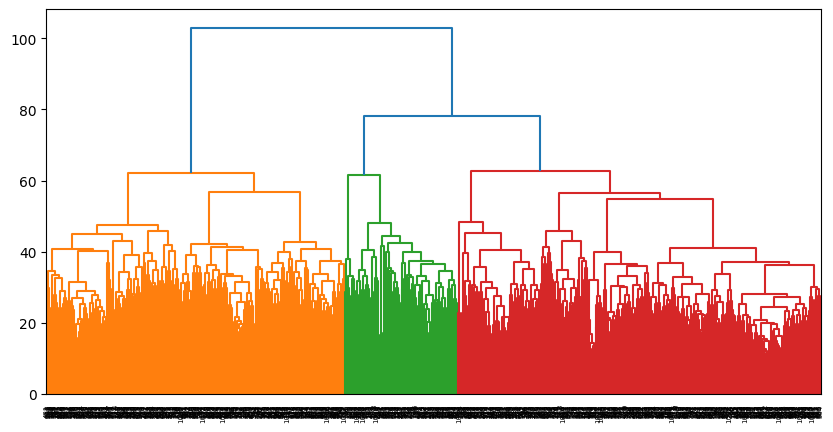

In [83]:
model_linkage = linkage(list(df['vector']), 'ward')

plt.figure(figsize=(10, 5)) #인치 기준
dendrogram(model_linkage,
          orientation='top',
          distance_sort='descendig',
          show_leaf_counts=False)
plt.show()

In [84]:
#실루엣 지수 확인 
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [102]:
#3개 클러스터로 분리하기
cluster_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_label = cluster_model.fit_predict(list(df['vector']))
cluster_label

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [86]:
#실루엣 지수 구하기 
n_cluster = []
clustering_score = []

#for문
for i in tqdm(range(2,15)) :
    cluster_model = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_label = cluster_model.fit_predict(list(df['vector']))
    score = silhouette_score(list(df['vector']), cluster_label)
    n_cluster.append(i)
    clustering_score.append(score)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:03<00:00,  4.01it/s]


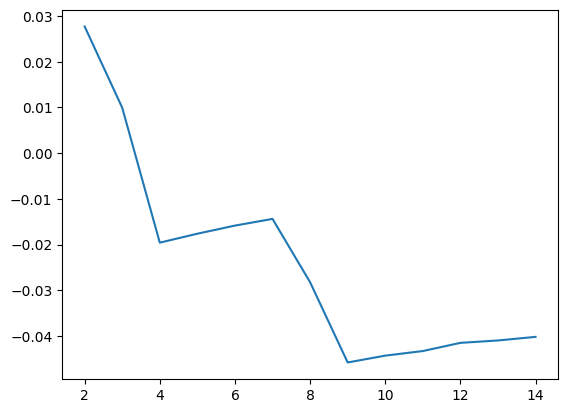

In [87]:
plt.plot(n_cluster, clustering_score)

In [106]:
result = pd.DataFrame({'n_cluster':n_cluster, 'score':clustering_score})
result

,n_cluster,score
0,2,0.027715
1,3,0.009945
2,4,-0.019581
3,5,-0.017626
4,6,-0.015851
5,7,-0.014386
6,8,-0.028240
7,9,-0.045799
8,10,-0.044301
9,11,-0.043298


In [103]:
all_document[0][:200]

' 가계부 지출 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 아끼다 고정 지출 생활비 아끼다 무 지출 직장인 짜다 테크 벌써 가계부 작성 한지 개월 되어다 생활비 원 생활비 원 생활비 지난달 대비 원 바 가계부 쓰다 의미 없다 정도 로비 슷 개월 사실 달 초 저녁 약속 시험 원서 접수 비 고양이 용품 화끈하다 돈 써다 버리다 때문 남다 달 쪼들리다 '

In [107]:
cluster_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_label = cluster_model.fit_predict(list(df['vector']))
cluster_label

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [112]:
#결과물 넣어주기 
df['cluster'] = cluster_label
df

,time,review,tagged_review,vector,cluster
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[가계부, 지출, 생활비, 정산, 만, 원, 가계부, 인, 가구, 자취, 생활비, ...","[-0.7512716, -0.36401916, -0.42330363, -0.5424...",0
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ...","[-0.21806592, -1.5534393, 0.97670776, 1.126477...",1
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,"[예금, 진실, 문득, 투자, 경제, 흐름, 알다, 예금, 안정, 이자, 바라보다,...","[0.2516184, -0.7921067, -0.2066104, -0.7261357...",0
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...,"[카카오, 뱅크, 청년, 전세, 자금, 대출, 연장, 금리, 변동, 카카오, 뱅크,...","[2.1138735, -2.89797, -1.661346, -0.20995872, ...",0
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...,"[탕, 다시다, 가다, 삼성, 병원, 가지, 베이컨, 그라탕, 해, 먹기, 미치다,...","[-1.3631692, 0.7304663, -1.853264, -1.9755169,...",1
...,...,...,...,...,...
1014,2022. 10. 11. 11:05,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...,"[스물, 보다, 주, 밸런스, 프렌즈, 토글, 리더, 스, 많다, 영감, 주다, 쯔...","[0.25923884, -1.6138186, 1.3513083, 1.2313381,...",2
1015,2023. 2. 5. 22:20,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모...,"[직장인, 생, 탤이, 생, 겨울방학, 끝, 동분서주, 바쁘다, 탤, 공주, 넘다,...","[-0.033567406, -0.49636593, 0.22517155, -4.549...",0
1016,2023. 4. 3. 14:11,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...,"[청년, 전세, 임대주택, 청약, 일정, 신청, 서울특별시, 순위, 청약, 신청, ...","[-1.1326004, -0.85432464, 0.35640538, -2.90792...",0
1017,2022. 9. 23. 1:20,외쳐 갓생 하이루이번 글 사진 레전드 많음 최대 장수 나의 갓생 시작 먹던 햄...,"[외치다, 생, 하이루, 글, 사진, 레전드, 많다, 최대, 장수, 생, 시작, 먹...","[0.3347935, 1.076179, -1.1698694, 2.0052185, 3...",1


In [114]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [113]:
df['cluster'].unique()

array([0, 1, 2], dtype=int64)

In [115]:
all_document = []

for i in df['cluster'].unique():
    print(i)
    pos_tagging = df[df['cluster'] == i]['tagged_review'] #해당되는 것만 포수태깅한테 가져다줌? 

    #실제로 다큐먼트를 뽑아주기 
    document = ' '
    for pos in pos_tagging :
        doc = ' '.join(pos) + ' '
        document += doc
    all_document.append(document)

0
1
2


In [116]:
all_document[0][:200]

' 가계부 지출 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 아끼다 고정 지출 생활비 아끼다 무 지출 직장인 짜다 테크 벌써 가계부 작성 한지 개월 되어다 생활비 원 생활비 원 생활비 지난달 대비 원 바 가계부 쓰다 의미 없다 정도 로비 슷 개월 사실 달 초 저녁 약속 시험 원서 접수 비 고양이 용품 화끈하다 돈 써다 버리다 때문 남다 달 쪼들리다 '

In [117]:
#TF-IDF 벡터라이저 선언
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(all_document)

In [118]:
#키워드 뽑아내기 
feature_name = vectorizer.get_feature_names_out()
feature_name

array(['가가', '가게', '가격', ..., '힛양', '힝구', '힝힝'], dtype=object)

In [119]:
#TF-IDF 값
tfidf_value = tfidf_matrix.toarray()

In [120]:
tfidf_value

array([[0.00229787, 0.00775532, 0.02039361, ..., 0.        , 0.00036987,
        0.        ],
       [0.00093713, 0.00773135, 0.01241701, ..., 0.00039668, 0.00030168,
        0.00039668],
       [0.00115342, 0.00230684, 0.00980407, ..., 0.        , 0.        ,
        0.        ]])

In [121]:
tfidf_df = pd.DataFrame(tfidf_value, columns = feature_name)
tfidf_df

,가가,가게,가격,가격표,가계,가계부,가계약,가고일,가공,가관,...,힘내쟈,힘드다,힘들다,힘쓰다,힘주다,힘줄,힘차다,힛양,힝구,힝힝
0,0.002298,0.007755,0.020394,0.000574,0.002298,0.120351,0.000486,0.000486,0.001110,0.000486,...,0.000000,0.010915,0.030447,0.000486,0.000000,0.000486,0.000000,0.000000,0.000370,0.000000
1,0.000937,0.007731,0.012417,0.000469,0.000937,0.018977,0.000000,0.000000,0.000000,0.000000,...,0.000397,0.009137,0.035611,0.000000,0.000603,0.000000,0.001587,0.000397,0.000302,0.000397
2,0.001153,0.002307,0.009804,0.000577,0.001730,0.043830,0.000000,0.000000,0.000743,0.000000,...,0.000000,0.010957,0.020185,0.000000,0.000743,0.000000,0.000000,0.000000,0.000000,0.000000


In [122]:
tfidf_df.index = df['cluster'].unique()
tfidf_df

,가가,가게,가격,가격표,가계,가계부,가계약,가고일,가공,가관,...,힘내쟈,힘드다,힘들다,힘쓰다,힘주다,힘줄,힘차다,힛양,힝구,힝힝
0,0.002298,0.007755,0.020394,0.000574,0.002298,0.120351,0.000486,0.000486,0.001110,0.000486,...,0.000000,0.010915,0.030447,0.000486,0.000000,0.000486,0.000000,0.000000,0.000370,0.000000
1,0.000937,0.007731,0.012417,0.000469,0.000937,0.018977,0.000000,0.000000,0.000000,0.000000,...,0.000397,0.009137,0.035611,0.000000,0.000603,0.000000,0.001587,0.000397,0.000302,0.000397
2,0.001153,0.002307,0.009804,0.000577,0.001730,0.043830,0.000000,0.000000,0.000743,0.000000,...,0.000000,0.010957,0.020185,0.000000,0.000743,0.000000,0.000000,0.000000,0.000000,0.000000


In [123]:
tfidf_df_T = tfidf_df.T
tfidf_df_T

,0,1,2
가가,0.002298,0.000937,0.001153
가게,0.007755,0.007731,0.002307
가격,0.020394,0.012417,0.009804
가격표,0.000574,0.000469,0.000577
가계,0.002298,0.000937,0.001730
...,...,...,...
힘줄,0.000486,0.000000,0.000000
힘차다,0.000000,0.001587,0.000000
힛양,0.000000,0.000397,0.000000
힝구,0.000370,0.000302,0.000000


In [124]:
for i in tfidf_df_T.columns : #컬럼단윅로 진행할거임 
    #컬럼별로 점수 정렬하기 
    tfidfvalue = tfidf_df_T[i].sort_values(ascending = False)
    #데이터 프레임으로 변환
    data = {'tfidf_sord': tfidfvalue.index, 'tfidf':tfidfvalue.values}
    data_df = pd.DataFrame(data)
    data_df.to_csv(f'cluster{i}_tf_idf.csv', encoding = 'utf-8-sig')

In [125]:
import pickle 

with open('clusterin_resul.pkl', 'wb') as f:
    pickle.dump(df, f)

# 9월 9일 

In [83]:
#필요한 라이브러리 임포트
import pandas as pd 
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [84]:
#클러스팅 파일 가져오기 
with open("clustering_result_project.pkl", 'rb') as f:
    df = pickle.load(f)
df

,time,review,re_review,review_words,vector,cluster
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 아끼...,"[가계부, 지출, 생활비, 정산, 가계부, 가구, 자취, 생활비, 식비, 고정, 지...","[0.91891223, -0.62368906, 0.6758929, -0.678698...",2
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ...","[-0.2629604, -0.5717506, 1.1107559, 0.5296085,...",2
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 안정...,"[예금, 진실, 문득, 투자, 경제, 흐름, 예금, 안정, 이자, 적금, 투자, 예...","[0.08295519, 0.24779752, 0.32473674, -0.340607...",1
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리승...,"[카카오, 뱅크, 청년, 전세, 자금, 대출, 연장, 금리, 변동, 카카오, 뱅크,...","[-0.7301975, -0.59152293, 1.864779, 0.3563278,...",2
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 급 ...,"[삼성, 병원, 가지, 베이컨, 그라탕, 먹기, 미치다, 폭우, 전쟁, 양양, 아버...","[-0.0634802, -0.074111454, 0.5433737, 0.691810...",1
...,...,...,...,...,...,...
1014,2022. 10. 11. 11:05,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...,"[스물, 밸런스, 프렌즈, 토글, 리더, 많다, 영감, 지언, 보고, 다방면, 여러...","[-2.3632855, -1.2914432, -1.4184966, -1.111231...",2
1015,2023. 2. 5. 22:20,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모...,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모든 ...,"[직장인, 탤이, 겨울방학, 동분서주, 바쁘다, 공주, 즐겁다, 모든, 포지션, 최...","[0.035588667, -1.5383601, 0.12325775, -0.12539...",2
1016,2023. 4. 3. 14:11,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사 ...,"[청년, 전세, 임대주택, 청약, 일정, 신청, 서울특별시, 순위, 청약, 신청, ...","[-0.17215164, 0.86128193, -0.3034307, 0.735444...",2
1017,2022. 9. 23. 1:20,외쳐 갓생 하이루이번 글 사진 레전드 많음 최대 장수 나의 갓생 시작 먹던 햄...,외쳐 갓생 하이루이번 글 사진 레전드 많음 최대 장수 나의 갓생 시작 먹던 햄버거...,"[하이루, 사진, 레전드, 많다, 최대, 장수, 시작, 햄버거, 상큼, 시작, 감자...","[1.5913376, 2.209388, 1.5190504, -2.2765062, 0...",0


# LDA 데이터 전처리 

In [85]:
#라이브러리 임포트
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

In [86]:
#클러스트 0번만 뽑기 
df_cluster0 = df[df['cluster']==0]
df_cluster0.head()

,time,review,re_review,review_words,vector,cluster
8,2022. 7. 24. 12:02,차 이번 주에 무엇을 했나요 주차 했다 갔다 샀다 먹었다 봤다 ...,차 이번 주에 무엇을 했나요 주차 했다 갔다 샀다 먹었다 봤다 등으로 구별하고 과...,"[주차, 구별, 특별하다, 감정, 치료, 대한, 생각, 예정, 적금, 만기, 생일,...","[1.8923904, 0.65716076, -0.6982866, -0.833886,...",0
14,2022. 12. 20. 23:55,역대급 기묘한 날 포스팅은 너무 오랜만뭐 항상 오랜만인거 같은데 진짜 갓생 ...,역대급 기묘한 날 포스팅은 너무 오랜만뭐 항상 오랜만인거 같은데 진짜 갓생 산다고...,"[역대, 기묘하다, 포스팅, 항상, 산다, 힘들다, 학교, 연말, 예산, 요구, 예...","[-0.6980092, 0.26811466, -0.71144485, -0.81764...",0
16,2023. 5. 22. 23:58,면접보는것도 지친다 은 시까지 오라고 해서 오전에 외출 시간 쓰고 면접보러 왔다 ...,면접보는것도 지친다 은 시까지 오라고 해서 오전에 외출 시간 쓰고 면접보러 왔다 ...,"[면접, 오라, 오전, 외출, 면접, 시로, 회사, 생각, 삭막하다, 명명, 정도,...","[0.08504643, 0.84271455, 0.518501, -2.430338, ...",0
23,2022. 9. 27. 2:46,원래 생일은 한 달이잖아요 잊힐 때쯤 쓰는가을생 여성의 포도가 철인가봐아부지가...,원래 생일은 한 달이잖아요 잊힐 때쯤 쓰는가을생 여성의 포도가 철인가봐아부지가 간식...,"[원래, 생일, 여성, 포도, 철인, 아부지, 간식, 포도, 샤인, 머스켓, 기분,...","[0.75699997, -0.06679923, -0.45145637, 0.81304...",0
32,2022. 10. 9. 16:20,팀 마침내 당첨되다 상상도 못한 일이 벌어지고 말았다바로 내가 만 포인트...,팀 마침내 당첨되다 상상도 못한 일이 벌어지고 말았다바로 내가 만 포인트에 당첨됐...,"[마침내, 당첨, 상상, 포인트, 당첨, 소식, 로거, 행복하다, 적도, 가족, 친...","[1.6443456, 1.0031017, 1.0276158, 0.27185035, ...",0


In [87]:
#단어 사전 만들기 
all_documents = list(df_cluster0['review_words'])
dictionary = Dictionary(all_documents)
dictionary.token2id

{'가격': 0,
 '가성': 1,
 '가장': 2,
 '가족': 3,
 '가지': 4,
 '간다': 5,
 '감정': 6,
 '강의': 7,
 '개월': 8,
 '거기': 9,
 '결정': 10,
 '계획': 11,
 '고등학생': 12,
 '공부': 13,
 '관련': 14,
 '관심': 15,
 '관절': 16,
 '괜찮다': 17,
 '교육': 18,
 '구별': 19,
 '구직': 20,
 '귀여웡': 21,
 '귀엽다': 22,
 '규칙': 23,
 '그냥': 24,
 '그렇다': 25,
 '금방': 26,
 '금액': 27,
 '급여': 28,
 '기념': 29,
 '기능': 30,
 '기력': 31,
 '기분': 32,
 '기차': 33,
 '나중': 34,
 '낮다': 35,
 '내일': 36,
 '놀람': 37,
 '높다': 38,
 '누가': 39,
 '달라': 40,
 '답답하다': 41,
 '대비': 42,
 '대신': 43,
 '대학생': 44,
 '대한': 45,
 '도록': 46,
 '도착': 47,
 '때문': 48,
 '로더': 49,
 '루틴': 50,
 '마비노기': 51,
 '마음': 52,
 '만기': 53,
 '만족스럽다': 54,
 '많다': 55,
 '매우': 56,
 '매일': 57,
 '머리': 58,
 '메인': 59,
 '모델': 60,
 '문제': 61,
 '미니드레스': 62,
 '미디어': 63,
 '미리': 64,
 '미세': 65,
 '미싱': 66,
 '민망하다': 67,
 '바느질': 68,
 '바랬기': 69,
 '바쁘다': 70,
 '반면': 71,
 '별거': 72,
 '별로': 73,
 '병원': 74,
 '보고': 75,
 '보기': 76,
 '보쌈': 77,
 '부라': 78,
 '비채': 79,
 '빠르다': 80,
 '사고': 81,
 '사기': 82,
 '사람': 83,
 '사려': 84,
 '사실': 85,
 '사이즈': 86,
 '사전': 87,
 '사진': 88,
 '산책':

In [88]:
corpus = []

for doc in all_documents :
    corpus.append(dictionary.doc2bow(doc))

corpus[0]

[(0, 2),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 3),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 3),
 (24, 2),
 (25, 3),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 2),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 2),
 (40, 2),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 2),
 (46, 2),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 3),
 (52, 2),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 2),
 (64, 2),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 2),
 (74, 1),
 (75, 1),
 (76, 2),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 2),
 (86, 1),
 (87, 2),
 (88, 2),
 (89, 1),
 (90, 1),
 (91, 5),
 (92, 12),
 (93, 2),
 (94, 1),
 (95, 2),
 (96, 1),
 (97, 1),
 (98, 2),
 (99, 1),
 (100, 1)

# LDA모델 만들기

In [89]:
# 3개의 토픽을 갖도록 LDA Modeling 

topic_num = 3

ldamodel = gensim.models.ldamodel.LdaModel(corpus,
                                           num_topics=topic_num,
                                           id2word=dictionary,
                                           passes=20,
                                           iterations=50,
                                           random_state=42
                                          )

In [90]:
ldamodel.print_topics(num_words=5)

[(0, '0.011*"생각" + 0.010*"아니다" + 0.009*"없다" + 0.006*"사람" + 0.006*"그렇다"'),
 (1, '0.017*"생각" + 0.013*"없다" + 0.010*"좋다" + 0.008*"사람" + 0.007*"아니다"'),
 (2, '0.016*"자산" + 0.014*"관리" + 0.008*"없다" + 0.007*"생각" + 0.006*"좋다"')]

In [91]:
#다큐먼트별로 토픽의 분포를 확인하기 
for i in range(0,21) :
    print(ldamodel.get_document_topics(corpus[i]))

[(1, 0.99722016)]
[(1, 0.99569744)]
[(0, 0.9747365), (1, 0.023942795)]
[(2, 0.9979031)]
[(2, 0.996431)]
[(0, 0.5678055), (1, 0.3277836), (2, 0.10441088)]
[(2, 0.9946273)]
[(1, 0.9975543)]
[(0, 0.9942085)]
[(0, 0.14837058), (2, 0.85098344)]
[(0, 0.582017), (2, 0.41462177)]
[(2, 0.99768126)]
[(2, 0.99770457)]
[(2, 0.9942383)]
[(0, 0.9976528)]
[(0, 0.99623203)]
[(1, 0.99398017)]
[(1, 0.9973138)]
[(1, 0.997696)]
[(0, 0.99511814)]
[(1, 0.9947988)]


### LDA 토픽 수 선정하기 

In [92]:
from gensim.models import CoherenceModel #coherence 모델 라이브러리
import matplotlib.pyplot as plt #그래프 그리기
import numpy as np

In [93]:
#perplexity

perplexity_socre = ldamodel.log_perplexity(corpus)
perplexity_socre

-7.959841431145392

In [94]:
#coherence
top_n = 3

coherence_model = CoherenceModel(model = ldamodel,
                                texts = all_documents,
                                dictionary = dictionary,
                                topn = top_n
                                )
cogerence_score = coherence_model.get_coherence()

cogerence_score

0.620982922912063

In [95]:
#그래프 만들기 

perplexity_values = []

#결과물 하나씩 확인하기 
for i in range(2,10) : 
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i , id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity Score')

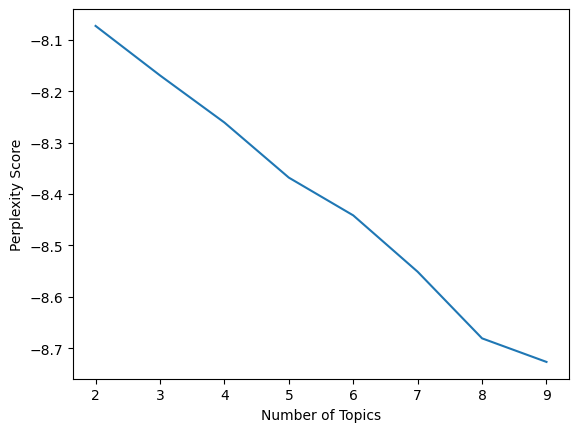

In [96]:
x = range(2,10)

plt.plot(x, perplexity_values)
#레이블링 하기 
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')


In [97]:
cohernce_values = []
top_n = 3

for i in tqdm(range(2,10)) : 
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model = ldamodel,
                                texts = all_documents,
                                dictionary = dictionary,
                                topn = top_n
                                )
    cohernce_v = coherence_model.get_coherence()
    cohernce_values.append(cohernce_v)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:59<00:00, 14.94s/it]


Text(0, 0.5, 'Coherence Score')

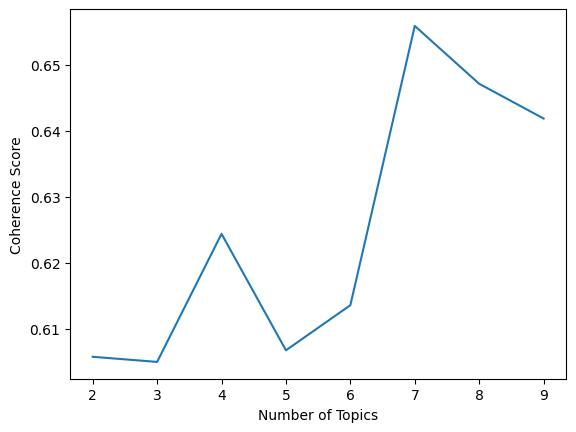

In [98]:
x = range(2,10)

plt.plot(x, cohernce_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

### 선정한 토픽 개수로  Action 넘버 매칭하기 


In [185]:

topic_num = 4

ldamodel = gensim.models.ldamodel.LdaModel(corpus,
                                           num_topics=topic_num,
                                           id2word=dictionary,
                                           passes=20,
                                           iterations=50,
                                           random_state=42
                                          )

In [186]:
ldamodel.get_document_topics(corpus)[0]

[(1, 0.9971726)]

In [187]:
action_align = []

#오래걸릴 때는 tqdm으로 진행상황 확인하기
for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc :
        label.append(score[0])
        value.append(score[1])
    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)


100%|███████████████████████████████████████████████████████████████████████████████| 166/166 [00:00<00:00, 507.27it/s]


In [188]:
action_align[:20]

[1, 3, 0, 2, 2, 0, 2, 1, 0, 3, 0, 1, 2, 2, 0, 0, 1, 1, 1, 0]

In [189]:
df_cluster0['action_cluster'] = action_align
df_cluster0

,review,cluster,review_words,action_cluster
8,차 이번 주에 무엇을 했나요 주차 했다 갔다 샀다 먹었다 봤다 ...,0,"[주차, 구별, 특별하다, 감정, 치료, 대한, 생각, 예정, 적금, 만기, 생일,...",1
14,역대급 기묘한 날 포스팅은 너무 오랜만뭐 항상 오랜만인거 같은데 진짜 갓생 ...,0,"[역대, 기묘하다, 포스팅, 항상, 산다, 힘들다, 학교, 연말, 예산, 요구, 예...",3
16,면접보는것도 지친다 은 시까지 오라고 해서 오전에 외출 시간 쓰고 면접보러 왔다 ...,0,"[면접, 오라, 오전, 외출, 면접, 시로, 회사, 생각, 삭막하다, 명명, 정도,...",0
23,원래 생일은 한 달이잖아요 잊힐 때쯤 쓰는가을생 여성의 포도가 철인가봐아부지가...,0,"[원래, 생일, 여성, 포도, 철인, 아부지, 간식, 포도, 샤인, 머스켓, 기분,...",2
32,팀 마침내 당첨되다 상상도 못한 일이 벌어지고 말았다바로 내가 만 포인트...,0,"[마침내, 당첨, 상상, 포인트, 당첨, 소식, 로거, 행복하다, 적도, 가족, 친...",2
...,...,...,...,...
993,너의 첫번째 졸업식 월요일 하랑이 학교 갈 준비준비물 하나씩 사 모으기 시...,0,"[졸업식, 월요일, 하랑, 학교, 준비, 준비물, 작가, 먼저, 준비, 실내, 포켓...",1
995,모공고 평택청북 록 산단형 행복주택 입주자격완화 추가모집 주거복지의 모든 것 주거찾...,0,"[모공, 평택, 청북, 행복, 주택, 자격, 완화, 추가, 모집, 주거, 복지, 모...",3
1000,광고 이 광고는 로보 어드 바이저 앱 의 광고이다시리즈가 몇 가지 있는데 모두 ...,0,"[광고, 광고, 로보, 어드, 바이, 광고, 시리즈, 가지, 주식, 투자, 관해, ...",1
1009,년 주 객관적인 은 나를 말해준다 주 한 월까지는 매주 수면과 자기계발 시간을...,0,"[객관, 수면, 자기계발, 측정, 정도, 루틴, 크게, 의미, 없다, 확실하다, 객...",1


In [190]:
df_cluster0['action_cluster'].value_counts()

action_cluster
1    55
0    49
2    48
3    14
Name: count, dtype: int64

## 시각화 하기 


In [191]:
#경고무시
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#LDA 시각화 라이브러리
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [192]:
#필요한 데이터 만들기 
prepared_data =  gensimvis.prepare(ldamodel, corpus, dictionary) 
pyLDAvis.save_html(prepared_data, 'ldavis_cluster0.html')

pyLDAvis.display(prepared_data)

In [193]:
topics = ldamodel.show_topics(num_topics = -1, formatted = True)

for topic_id, topic_desc in topics : 
    print(f"Topic Id : {topic_id}, Description : {topic_desc}")

Topic Id : 0, Description : 0.015*"생각" + 0.012*"없다" + 0.012*"아니다" + 0.008*"회사" + 0.007*"그렇다" + 0.007*"사람" + 0.007*"좋다" + 0.006*"많다" + 0.006*"지금" + 0.004*"시작"
Topic Id : 1, Description : 0.018*"생각" + 0.013*"없다" + 0.012*"좋다" + 0.008*"사람" + 0.007*"아니다" + 0.007*"그렇다" + 0.006*"많다" + 0.006*"수업" + 0.006*"공부" + 0.005*"시작"
Topic Id : 2, Description : 0.017*"자산" + 0.015*"관리" + 0.009*"없다" + 0.008*"생각" + 0.007*"아니다" + 0.006*"투자" + 0.006*"시작" + 0.005*"좋다" + 0.005*"만원" + 0.005*"강의"
Topic Id : 3, Description : 0.022*"청년" + 0.014*"신청" + 0.014*"주택" + 0.011*"소득" + 0.009*"청약" + 0.007*"만원" + 0.007*"가입" + 0.006*"계좌" + 0.006*"확인" + 0.006*"순위"


In [134]:
0->1
1->3
2 ->2
3 ->4
4-1

SyntaxError: invalid syntax (3613443034.py, line 1)

In [194]:
new_action_topic = []

for i in df_cluster0['action_cluster']:
    if i == 0:
        n = 1
    elif i == 1:
        n = 3
    elif i == 2:
        n = 2
    # elif i == 3:
    #     n = 4
    else:
        n = 4  # 혹시 매핑 안 된 값은 그대로 둠
    new_action_topic.append(n)


In [195]:
df_cluster0.action_cluster = new_action_topic
df_cluster0.action_cluster.value_counts()

action_cluster
3    55
1    49
2    48
4    14
Name: count, dtype: int64

In [196]:
df_cluster0

,review,cluster,review_words,action_cluster
8,차 이번 주에 무엇을 했나요 주차 했다 갔다 샀다 먹었다 봤다 ...,0,"[주차, 구별, 특별하다, 감정, 치료, 대한, 생각, 예정, 적금, 만기, 생일,...",3
14,역대급 기묘한 날 포스팅은 너무 오랜만뭐 항상 오랜만인거 같은데 진짜 갓생 ...,0,"[역대, 기묘하다, 포스팅, 항상, 산다, 힘들다, 학교, 연말, 예산, 요구, 예...",4
16,면접보는것도 지친다 은 시까지 오라고 해서 오전에 외출 시간 쓰고 면접보러 왔다 ...,0,"[면접, 오라, 오전, 외출, 면접, 시로, 회사, 생각, 삭막하다, 명명, 정도,...",1
23,원래 생일은 한 달이잖아요 잊힐 때쯤 쓰는가을생 여성의 포도가 철인가봐아부지가...,0,"[원래, 생일, 여성, 포도, 철인, 아부지, 간식, 포도, 샤인, 머스켓, 기분,...",2
32,팀 마침내 당첨되다 상상도 못한 일이 벌어지고 말았다바로 내가 만 포인트...,0,"[마침내, 당첨, 상상, 포인트, 당첨, 소식, 로거, 행복하다, 적도, 가족, 친...",2
...,...,...,...,...
993,너의 첫번째 졸업식 월요일 하랑이 학교 갈 준비준비물 하나씩 사 모으기 시...,0,"[졸업식, 월요일, 하랑, 학교, 준비, 준비물, 작가, 먼저, 준비, 실내, 포켓...",3
995,모공고 평택청북 록 산단형 행복주택 입주자격완화 추가모집 주거복지의 모든 것 주거찾...,0,"[모공, 평택, 청북, 행복, 주택, 자격, 완화, 추가, 모집, 주거, 복지, 모...",4
1000,광고 이 광고는 로보 어드 바이저 앱 의 광고이다시리즈가 몇 가지 있는데 모두 ...,0,"[광고, 광고, 로보, 어드, 바이, 광고, 시리즈, 가지, 주식, 투자, 관해, ...",3
1009,년 주 객관적인 은 나를 말해준다 주 한 월까지는 매주 수면과 자기계발 시간을...,0,"[객관, 수면, 자기계발, 측정, 정도, 루틴, 크게, 의미, 없다, 확실하다, 객...",3


In [163]:
#다음 분석을 위해 저장하기 
df_cluster0 = df_cluster0[['review','cluster','review_words','action_cluster']]
df_cluster0

,review,cluster,review_words,action_cluster
8,차 이번 주에 무엇을 했나요 주차 했다 갔다 샀다 먹었다 봤다 ...,0,"[주차, 구별, 특별하다, 감정, 치료, 대한, 생각, 예정, 적금, 만기, 생일,...",2
14,역대급 기묘한 날 포스팅은 너무 오랜만뭐 항상 오랜만인거 같은데 진짜 갓생 ...,0,"[역대, 기묘하다, 포스팅, 항상, 산다, 힘들다, 학교, 연말, 예산, 요구, 예...",5
16,면접보는것도 지친다 은 시까지 오라고 해서 오전에 외출 시간 쓰고 면접보러 왔다 ...,0,"[면접, 오라, 오전, 외출, 면접, 시로, 회사, 생각, 삭막하다, 명명, 정도,...",1
23,원래 생일은 한 달이잖아요 잊힐 때쯤 쓰는가을생 여성의 포도가 철인가봐아부지가...,0,"[원래, 생일, 여성, 포도, 철인, 아부지, 간식, 포도, 샤인, 머스켓, 기분,...",3
32,팀 마침내 당첨되다 상상도 못한 일이 벌어지고 말았다바로 내가 만 포인트...,0,"[마침내, 당첨, 상상, 포인트, 당첨, 소식, 로거, 행복하다, 적도, 가족, 친...",3
...,...,...,...,...
993,너의 첫번째 졸업식 월요일 하랑이 학교 갈 준비준비물 하나씩 사 모으기 시...,0,"[졸업식, 월요일, 하랑, 학교, 준비, 준비물, 작가, 먼저, 준비, 실내, 포켓...",2
995,모공고 평택청북 록 산단형 행복주택 입주자격완화 추가모집 주거복지의 모든 것 주거찾...,0,"[모공, 평택, 청북, 행복, 주택, 자격, 완화, 추가, 모집, 주거, 복지, 모...",5
1000,광고 이 광고는 로보 어드 바이저 앱 의 광고이다시리즈가 몇 가지 있는데 모두 ...,0,"[광고, 광고, 로보, 어드, 바이, 광고, 시리즈, 가지, 주식, 투자, 관해, ...",1
1009,년 주 객관적인 은 나를 말해준다 주 한 월까지는 매주 수면과 자기계발 시간을...,0,"[객관, 수면, 자기계발, 측정, 정도, 루틴, 크게, 의미, 없다, 확실하다, 객...",1


In [164]:
df_cluster0.to_csv('Cluster0.csv',  encoding = 'utf-8-sig')

In [165]:
#백업용
with open('Cluster0.pkl','wb') as f:
    pickle.dump(df_cluster0, f)